# Introduction:
I work for the online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. My job is to identify patterns that determine whether a game succeeds or not. This will allow the company to spot potential big winners and plan advertising campaigns.

## Analysis Outline:

- Adressed the data, changed the columns names, changed the datatypes to more relevant ones.
- Handeled missing values and gave reasons to why they are missing
- Calculated the total sales of each game
- Preformed EDA, created graphs and answered relevant questions.
- Filtered the data based on my analysis
- Created a user type for each region
- Tested hypothesises about the average user ratings on different platforms.
- Wrote my conclusion with recomendations to the buisness.

# Step 1: Opening the data and studying the general Information:

Installing the updated libaries:

In [1]:
!pip install -U matplotlib

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 10.3 MB 1.4 MB/s eta 0:00:01


In [2]:
!pip install -U pandas

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 10.8 MB 89 kB/s eta 0:00:01


In [3]:
!pip install -U numpy

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 15.7 MB 1.4 MB/s eta 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


Importing liberies:

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
from scipy import stats as st

Let's download the dataset:

In [5]:
try:
    game_data = pd.read_csv(r'C:\Users\nadav\OneDrive\מסמכים\Practicum100\databases\games.csv')
except:
    game_data = pd.read_csv('/datasets/games.csv')

Let's have a general look at the dataset:

In [6]:
game_data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [7]:
game_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [8]:
game_data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [9]:
game_data.describe(include = 'object')

,Name,Platform,Genre,User_Score,Rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990


In [10]:
game_data['Platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [11]:
game_data['User_Score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: User_Score, Length: 96, dtype: int64

In [12]:
game_data['Rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: Rating, dtype: int64

In [13]:
game_data['Genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

### Conclusion:

We have quite a few problems in our data. First of all, Our columns are not in Lowercase, so we need to change that. Secondly, We have missing values in several columns, that we will handle. Finally, we have a few columns with the wrong data types. We have a lot of work to do!

# Step 2: Preparing the data:

We see we have lots of problems with our data. First, let's change the columns names to lowercase:

In [14]:
lis = game_data.columns
lis = lis.str.lower()
game_data.columns = lis
#check
game_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Let's start tackeling the missing values. First, the 2 missing values in the 'Name' column:

In [15]:
game_data.loc[game_data['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


We see we really don't have much information about this value. Our most significant one is that it's on the 'GEN' platform. We know there aren't a lot of games using the 'GEN' platform, so let's check them:

In [16]:
game_data.loc[game_data['platform'] == 'GEN']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
145,Sonic the Hedgehog 2,GEN,1992.0,Platform,4.47,1.20,0.16,0.19,NaN,NaN,NaN
257,Sonic the Hedgehog,GEN,1991.0,Platform,3.03,0.91,0.26,0.13,NaN,NaN,NaN
564,Mortal Kombat,GEN,1992.0,Fighting,1.95,0.63,0.00,0.09,NaN,NaN,NaN
588,Streets of Rage,GEN,1990.0,Action,1.86,0.55,0.11,0.08,NaN,NaN,NaN
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
832,NBA Jam,GEN,1992.0,Sports,1.75,0.25,0.00,0.05,NaN,NaN,NaN
960,Sonic & Knuckles,GEN,1994.0,Platform,1.24,0.43,0.03,0.12,NaN,NaN,NaN
996,Sonic the Hedgehog 3,GEN,1994.0,Platform,1.02,0.47,0.20,0.07,NaN,NaN,NaN
1099,Street Fighter II': Special Champion Edition,GEN,1992.0,Fighting,1.00,0.30,0.31,0.04,NaN,NaN,NaN
1365,Disney's The Lion King,GEN,1994.0,Platform,0.97,0.37,0.03,0.05,NaN,NaN,NaN


We see there is no indication as to what the games might be, so we'll delete them:

In [17]:
game_data= game_data.dropna(subset = ['name'])
# check
game_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


That took care of the missing values in the 'genre' column too, so that's good!

Let's check the missing values in the year of release:

In [18]:
game_data.loc[game_data['year_of_release'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


These missing values look random. Some maybe have the year of their release in the title, but thats not all the video games. This is a very small percentage of the data, so let's delete it:

In [19]:
game_data = game_data.dropna(subset = ['year_of_release'])
game_data = game_data.reset_index(drop = True)
#check
game_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Let's move on to the rating mising values:

In [20]:
game_data.loc[game_data['rating'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16440,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16441,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16442,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


These values seem like games that weren't given a rating.. Let's classify these as 'Unknown':

In [21]:
game_data['rating'] = game_data['rating'].fillna('Unknown')

In [22]:
game_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           16444 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Now, let's assign missing values to 'user_score'. Here we need to also fill in missing values, and replace values with 'tbd'. My assumption is that the user score and the critic score are very correlated. Therfore, Let's assign the critic score divided by 10 to the user score:

In [23]:
game_data['user_score'] = np.where((game_data['user_score'].isnull()), (game_data['critic_score'] / 10), game_data['user_score'])
#check
game_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9872 non-null   object 
 10  rating           16444 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Now we need to check the 'tbd' values in the user_score column:

In [24]:
game_data.loc[(game_data['user_score'] == 'tbd')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
300,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
516,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
639,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
709,Just Dance Kids,Wii,2010.0,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16424,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16426,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16427,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16433,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


'tbd' = To be dicided. This means that the game did get scores, but not enough to publish an official average on the website. Since we know the games did get reviews, just not enough, we can assume that the reviews are simillar to other games from the same genre. Let's fill that in: 

In [25]:
grouped_rating = game_data.loc[game_data['user_score'] != 'tbd']
grouped_rating['user_score'] = grouped_rating['user_score'].astype('float')
grouped_rating = grouped_rating.groupby('genre')['user_score'].mean()
for i in game_data.index:
            if game_data['user_score'][i] =='tbd':
                game_data['user_score'][i] = grouped_rating[game_data['genre'][i]]
# checking everything is complete
game_data.loc[(game_data['user_score'] == 'tbd')].count()

/home/jovyan/.local/lib/python3.7/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

Great! We handled the tbd values!

Now, we can change the 'user_score' to float:

In [26]:
game_data['user_score'] = game_data['user_score'].astype('float')
game_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9872 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


Let's do the same the other way round:

In [27]:
game_data['critic_score'] = np.where((game_data['critic_score'].isnull()), (game_data['user_score'] * 10), game_data['critic_score'])
game_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     9872 non-null   float64
 9   user_score       9872 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


We still have a lot of missing values.. these values are might old games that didn't get reviews online, or minor games that didn't get reviews at all. Anyway, we can't determine these reviews based on the data we have, so we'll assign an indicator for us to know it's a missing value

In [28]:
game_data['user_score'] = game_data['user_score'].fillna(-1)
game_data['critic_score'] = game_data['critic_score'].fillna(-1)
game_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


Now,Let's create a column that sums up all of the sales we have.

In [29]:
game_data['total_sales'] = game_data['na_sales'] + game_data['eu_sales'] + game_data['jp_sales'] + game_data['other_sales']
game_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.5+ MB


Let's change the datatypes of 'year_of_release' and 'critic_score' to integer. these will always be whole numbers, so we should change the type accordingly:

In [30]:
lis= ['year_of_release', 'critic_score']
for i in lis:
    game_data[i] = game_data[i].astype('int')
game_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int64  
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(6), int64(2), object(4)
memory usage: 1.5+ MB


Looks like our data is ready to go!

### Conclusion:
In this step, We changed the column names to lowercase, We handled missing values: Deleted the missing values from the 'name' and 'year_of_release' columns, filled some in the 'critic_score' and 'user_score' columns, and left some. We also encountered the 'tbd' value, understood it's meaning and filled the data accordingly. Finally, We changed some columns datatypes.

# Step 3: Analysing the data:

Let's create a graph showing how many games were made each year:

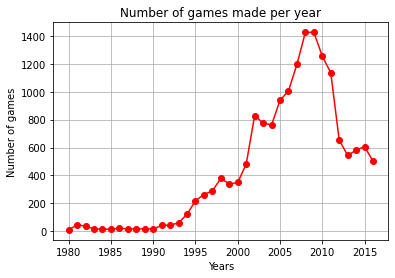

In [31]:
ax = plt.plot(game_data['year_of_release'].value_counts().sort_index(), color = 'red', marker = 'o')
plt.title('Number of games made per year')
plt.xlabel('Years')
plt.ylabel('Number of games')
plt.grid();

This is a very interesting graph. We can see from 1980 to 1995 the number of games made was very small, close to 0. Then, in about 10 years, the number of games per year shot up to about 1400 games per year! After 2010, The number of games starts to go down and it's declining to this day. When we see this graph, we can tell how the gaming industry changed during the course of time. For our analysis, we can note that the period between 1980 and 1995 isn't relevant, because the gaming industry was in a very different place back then. 

In order to look at what affects a game's price, we should look at the platforms first. If we have the same game that is sold on different platforms, By finding the price differnces, we can easlly see if the platform affects the price.

Now let's take a look at the platforms. We'll check which platform sold the most:

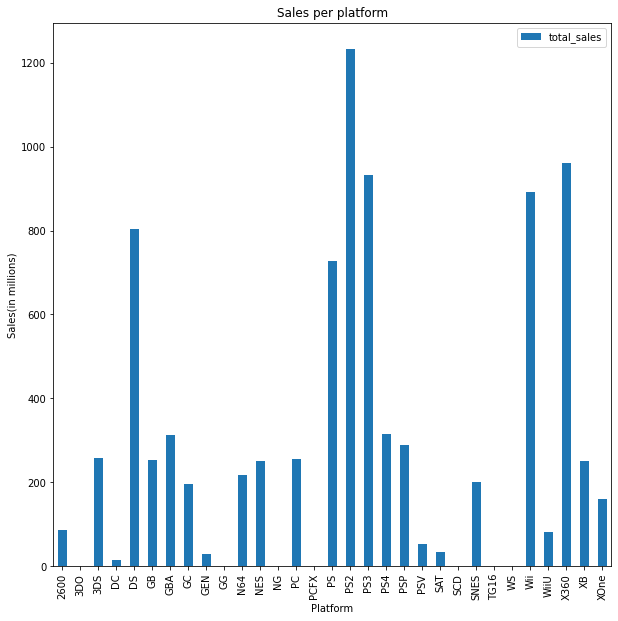

In [32]:
game_data.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').plot(kind = 'bar', figsize = (10,10))
plt.title('Sales per platform')
plt.xlabel('Platform')
plt.ylabel('Sales(in millions)');

We see we have 6 platforms that have much more sales revenue than the rest: DS,P5,PS2,PS3,Wii and X360. Let's see how do their sales look per year:

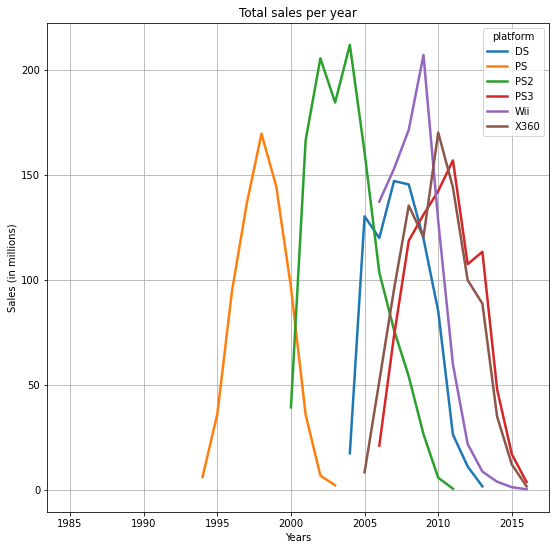

In [33]:
pop_platform = game_data.query('platform == ("DS","PS","PS2","PS3", "Wii","X360")')
pop_platform.pivot_table(index = 'year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum').plot(figsize = (9,9), linewidth = 2.5)
plt.title("Total sales per year")
plt.xlabel('Years')
plt.ylabel('Sales (in millions)')
plt.grid();

It seems like our most popular platforms barely have any sales now. Let's check other platforms that don't have sales now:

In [34]:
new_games = game_data.query('year_of_release == 2016')
game_plat = game_data['platform'].unique()
new_game_plat = new_games['platform'].unique()
for i in game_plat:
    if i not in new_game_plat:
        print(i)

NES
GB
DS
PS2
SNES
GBA
N64
PS
XB
2600
PSP
GC
GEN
DC
SAT
SCD
WS
NG
TG16
3DO
GG
PCFX


We can see that most of the platforms, even very popular ones like PS or DS, don't have any sales this year! From the graph we saw, It lookes as if a typical platform has a lifetime: It starts from a low point, within 5 years it reaches it's peak, and within 10 years it dosen't sell anymore. This is probably due to the huge development of the gaming world: A new big platform comes every 5 years and takes away the popular platform's sales. 

From the data above, We can determine that in order to predict a game's price for the following year, We need to look at data only from the past 2 years. In both graphs, We can see how quickly the gaming market is changing: We have much less games made, And historiclly popular platforms are no longer popular. This means that the only relevant data for us to use is from 2 years ago.

Let's filter our data to contain only games from the past 2 years:

In [36]:
past_two_years = game_data.query('year_of_release >= 2015')
past_two_years.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1108 entries, 31 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1108 non-null   object 
 1   platform         1108 non-null   object 
 2   year_of_release  1108 non-null   int64  
 3   genre            1108 non-null   object 
 4   na_sales         1108 non-null   float64
 5   eu_sales         1108 non-null   float64
 6   jp_sales         1108 non-null   float64
 7   other_sales      1108 non-null   float64
 8   critic_score     1108 non-null   int64  
 9   user_score       1108 non-null   float64
 10  rating           1108 non-null   object 
 11  total_sales      1108 non-null   float64
dtypes: float64(6), int64(2), object(4)
memory usage: 112.5+ KB


We lost a lot of data, but we are left with the most relevant.

Let's check what platform sold the most during the 2 years:

In [1]:
past_two_years.groupby('platform')['total_sales'].sum().plot(y = 'platform',kind = 'pie', figsize = (10,10),autopct="%.2f",fontsize=15)
plt.title("Percentage of total sales per platform - past 2 years")
plt.ylabel("100% = Total game sales")

NameError: name 'past_two_years' is not defined

We see we have 3 dominant platforms: PS4,XOne, and 3DS. Out of them, Let's check growth: 

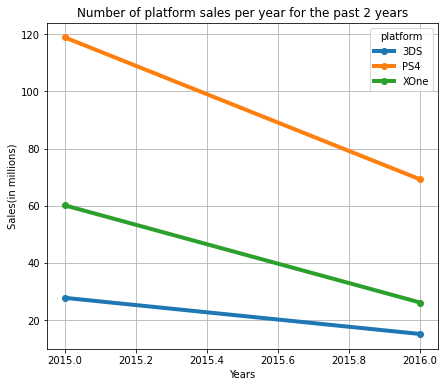

In [38]:
past_two_years.query('platform == ("PS4","XOne","3DS")').pivot_table(index = 'year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum').plot(figsize = (7,6), linewidth = 4, marker = 'o')
plt.title('Number of platform sales per year for the past 2 years')
plt.xlabel('Years')
plt.ylabel('Sales(in millions)')
plt.grid();

We can see that all of the games had a decrease in sales in 2016. This shows the decrease in the gaming industry for the past 5 years that we saw in the first graph. We see that even the most popular platforms had a decrease in the past year.

Let's check how the sales of the platform distribute in the past 2 years:

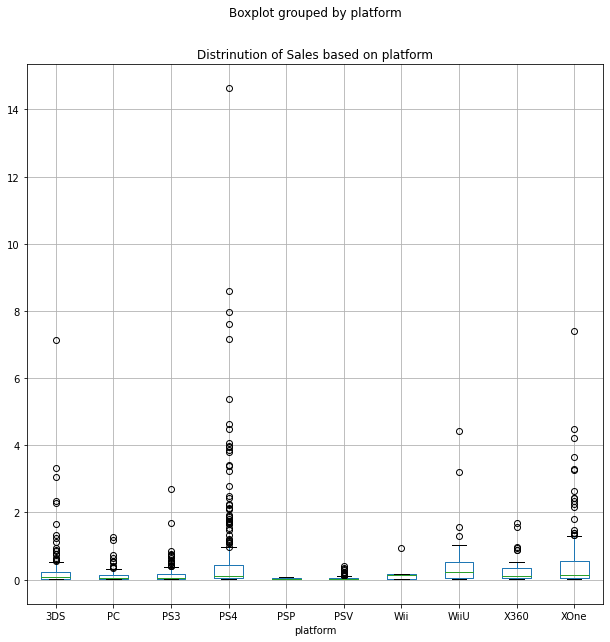

In [39]:
past_two_years.boxplot('total_sales', by = 'platform', figsize = (10,10))
plt.title('Distrinution of Sales based on platform');

We see we have a lot of outliners. Let's determine the range:

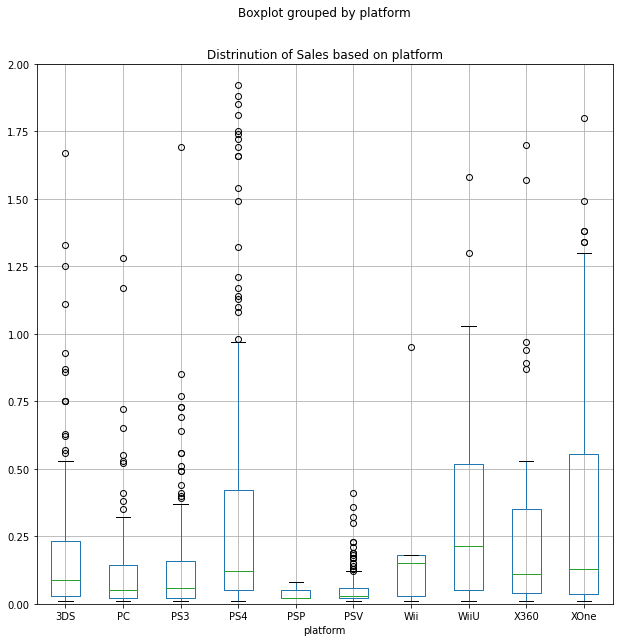

In [40]:
past_two_years.boxplot('total_sales', by = 'platform', figsize = (10,10))
plt.ylim(0,2)
plt.title('Distrinution of Sales based on platform');

We can see that the median number of sales for all platforms don't have significant differnces, and are all very low(the high ones get to 0.25). The big suprise is 'WiiU', That has the highest median value, but only has 5% of the sales. Let's check the average number:

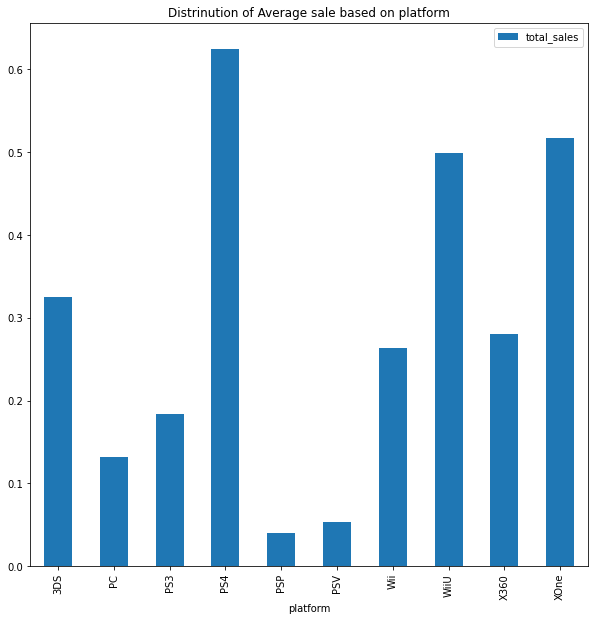

In [41]:
past_two_years.pivot_table(index = 'platform', values = 'total_sales').plot(kind = 'bar', figsize = (10,10))
plt.title('Distrinution of Average sale based on platform');

Here we see significant differences between the maximum 0.6 to the minimum 0.1.

We can learn a few things from these graphs. The main thing is the much bigger range in relation to the median. For platforms with high average sales, We can learn that the range of their sales is very high; This might be because of the platform's increasing/ decreasing popularity, or because we have games on the specific platform that have a huge amount of sales.

Now the platforms with the highest average sale are indeed PS4 and XOne, but WiiU is not far behind them! The WiiU's median and average values in relation to it's sales meen that the platform is very stable: This platform sells games at good prices, But they don't sell a lot of them. We definetly need to take that into account when we determine game prices.

Now that we saw how the platform type affects the price, let's check the critics. Our assumption would be that the critic's and user's opinion would affect the sales. In order to check this, We'll use our most popular platform: PS4.


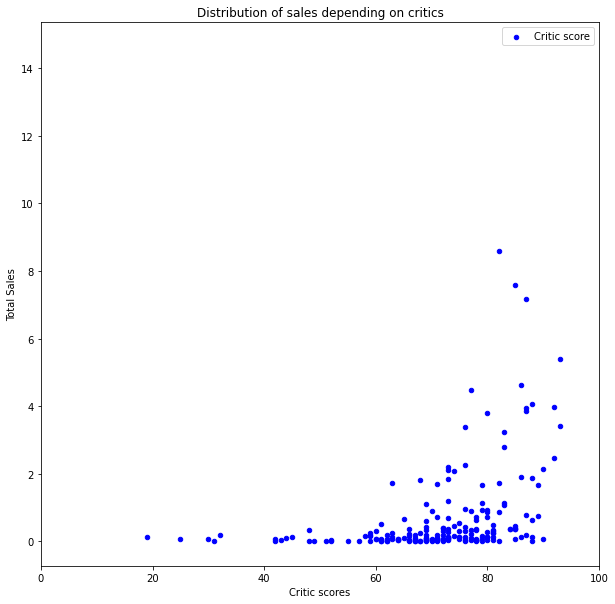

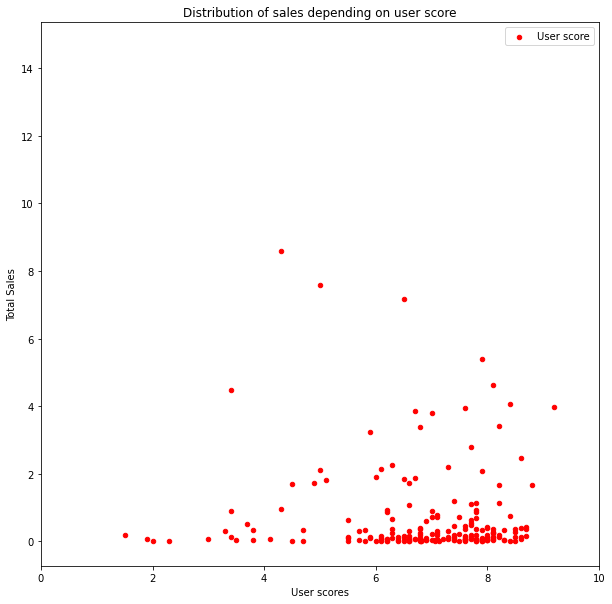

In [42]:
ax = past_two_years.query('platform == "PS4"').plot.scatter(x= 'critic_score', y = 'total_sales', color = 'Blue', label = 'Critic score', figsize = (10,10), xlim = (0,100))
plt.title("Distribution of sales depending on critics")
plt.xlabel("Critic scores")
plt.ylabel("Total Sales");
past_two_years.query('platform == "PS4"').plot.scatter( x = 'user_score', y = 'total_sales', color = 'Red', label = 'User score', figsize = (10,10), xlim = (0,10))
plt.title("Distribution of sales depending on user score")
plt.xlabel("User scores")
plt.ylabel("Total Sales");

Just from the look at the scatter plots, we can see that the reviews definetly affect sales in some messure: The sales go up only after a certain score in both graphs. We can see that crtic scores matter a bit more though, As we can see that as we go higher in the critic score, Our sales are higher. Let's check the correlation between these columns:

In [43]:
past_two_years.query('platform == "PS4"')[['total_sales','critic_score','user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.155614,0.060363
critic_score,0.155614,1.000000,0.962642
user_score,0.060363,0.962642,1.000000


We can see we were right in our assumption, and critic score's correlation to sales is double the user score's correlation. We also see they are both possitive values, which means they do affect the price. However, these are relativly small numbers, so they don't affect sales significantly. 

Let's check how the same game sells on different platforms:

In [44]:
#creating a list of games with that were released on more than one platform:
number_of_platforms = []
for i in past_two_years['name'].value_counts():
    if i > 1:
        if past_two_years['name'].value_counts().index[i] not in number_of_platforms:
            number_of_platforms.append(past_two_years['name'].value_counts().index[i])
#check
number_of_platforms

['LEGO Dimensions',
 'Adventure Time: Finn & Jake Investigations',
 'Rugby World Cup 2015',
 'Just Dance 2016',
 'Just Dance 2017',
 "LEGO Marvel's Avengers",
 'Skylanders: SuperChargers']

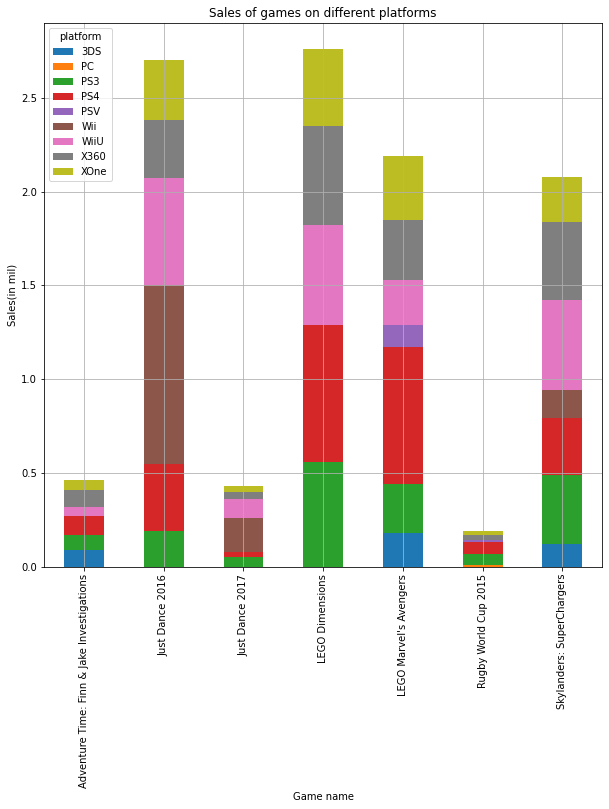

In [45]:
#creating graph
past_two_years.query('name == @number_of_platforms').pivot_table(index = 'name', columns = 'platform', values = 'total_sales', aggfunc = 'sum').plot(kind = 'bar', figsize = (10,10),stacked = True)
plt.grid()
plt.title('Sales of games on different platforms')
plt.xlabel('Game name')
plt.ylabel('Sales(in mil)');

Well this is an interesting graph. We can definetly see what platforms dominate what games. It seems as if the 'Wii' platforms dominate the dance games, PS dominate the sports games, PS and XBOX sell the most in the action games, And in the role playing games we see 3DS coming through.

Since we saw how big our sports sales are, Let's check the distribution of games per genre:

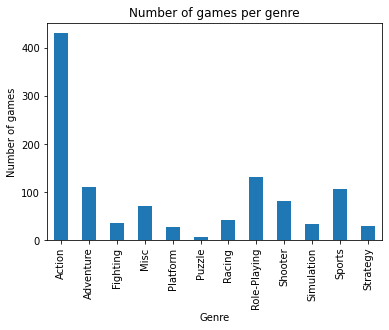

In [46]:
past_two_years.pivot_table(index = 'genre', values = 'name', aggfunc = 'count').plot(kind = 'bar', legend = False)
plt.title('Number of games per genre')
plt.xlabel('Genre')
plt.ylabel('Number of games');

Now let's check revenue per genre:

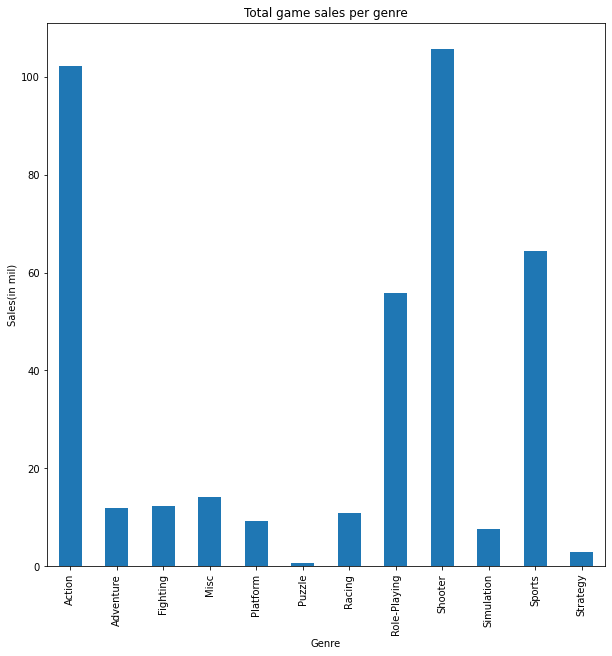

In [47]:
past_two_years.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'sum').plot(kind = 'bar', figsize = (10,10), legend = False)
plt.title('Total game sales per genre')
plt.xlabel('Genre')
plt.ylabel('Sales(in mil)');

We see we have 4 popular game types: 'Action','Role-Playing', 'Shooter' and 'Sports'. We can see from the first graph that action games are made much more than the rest of the games, Yet shooter games still have a greater revenue. We have something in common about these games: These are all genres of games we saw in the previous chart, Of games that are rleased on numerous platforms. This means that the more platforms a game is released on, the better it will sell.

# Step 4: Create User ID

Let's create a user id. First, Let's check the most profitable platforms for each genre:

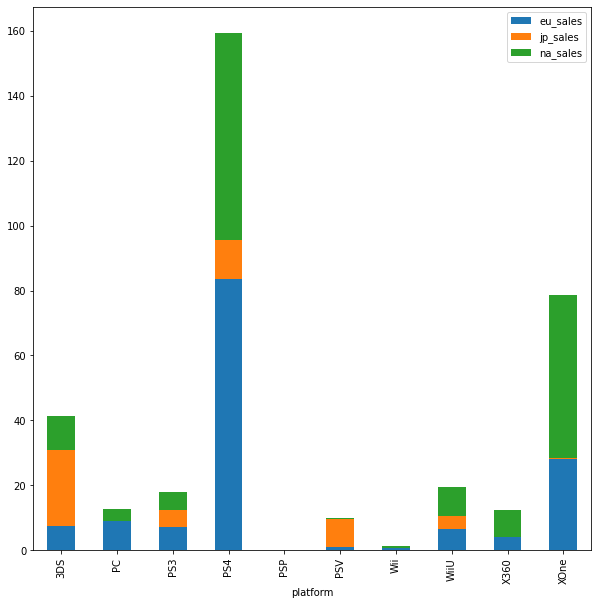

In [48]:
#starting with north america:
past_two_years.pivot_table(index = 'platform', values = ['na_sales','eu_sales','jp_sales'], aggfunc = 'sum').plot.bar(figsize = (10,10), stacked = True);

In [49]:
print("Top 5 platforms in America:")
print(past_two_years.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum').sort_values('na_sales',ascending = False)[0:5])
print("Top 5 platforms in Europe:")
print(past_two_years.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum').sort_values('eu_sales',ascending = False)[0:5])
print("Top 5 platforms in Japan:")
print(past_two_years.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum').sort_values('jp_sales',ascending = False)[0:5])

Top 5 platforms in America:
          na_sales
platform          
PS4          63.86
XOne         50.30
3DS          10.31
WiiU          8.86
X360          8.05
Top 5 platforms in Europe:
          eu_sales
platform          
PS4          83.54
XOne         28.10
PC            9.10
3DS           7.39
PS3           7.30
Top 5 platforms in Japan:
          jp_sales
platform          
3DS          23.55
PS4          12.05
PSV           8.41
PS3           4.97
WiiU          4.12


We see differences in the regions: In America and Europe, The most popular platforms are PS4 and XOne. All the other platforms behind them are much smaller. In Japan though, The most Popular platform is 3DS, with the next in line, 'PS4', recording nearly half the sales.

Let's check the most popular genres per region:

<AxesSubplot:xlabel='genre'>

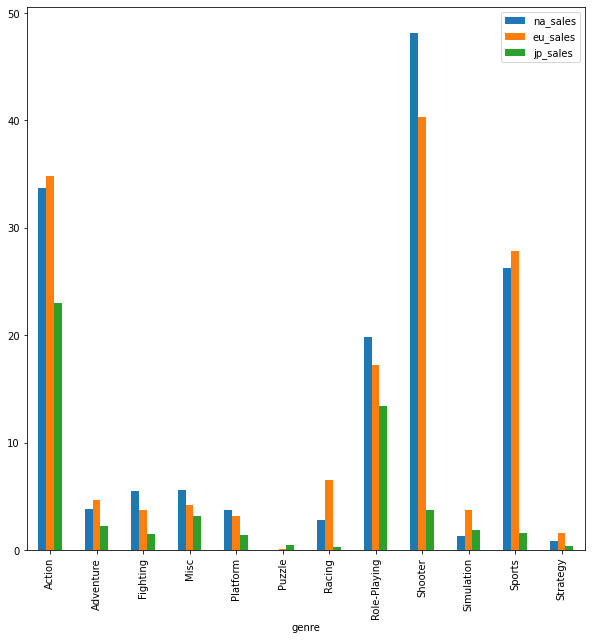

In [50]:
past_two_years.groupby('genre')[['na_sales','eu_sales', 'jp_sales']].sum().plot.bar(figsize = (10,10))

In [51]:
print("Top 5 genres in America:")
print(past_two_years.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum').sort_values('na_sales',ascending = False)[0:5])
print("Top 5 genres in Europe:")
print(past_two_years.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum').sort_values('eu_sales',ascending = False)[0:5])
print("Top 5 genres in Japan:")
print(past_two_years.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum').sort_values('jp_sales',ascending = False)[0:5])

Top 5 genres in America:
              na_sales
genre                 
Shooter          48.18
Action           33.68
Sports           26.31
Role-Playing     19.82
Misc              5.58
Top 5 genres in Europe:
              eu_sales
genre                 
Shooter          40.28
Action           34.82
Sports           27.82
Role-Playing     17.21
Racing            6.52
Top 5 genres in Japan:
              jp_sales
genre                 
Action           23.05
Role-Playing     13.41
Shooter           3.79
Misc              3.19
Adventure         2.22


We see that in Europe and in North America, The Popular genres are Exactly the same. They are the same popular genres we saw beforehand. This is because they have the same culture. In Japan however, Although we do see a similar popular genre in action, coming in second place is roleplaying, and the rest are way behind them. This is probably because of the different place that games take in Japanease culture.

Let's check if the ESRB rating affects sales in different regions: 

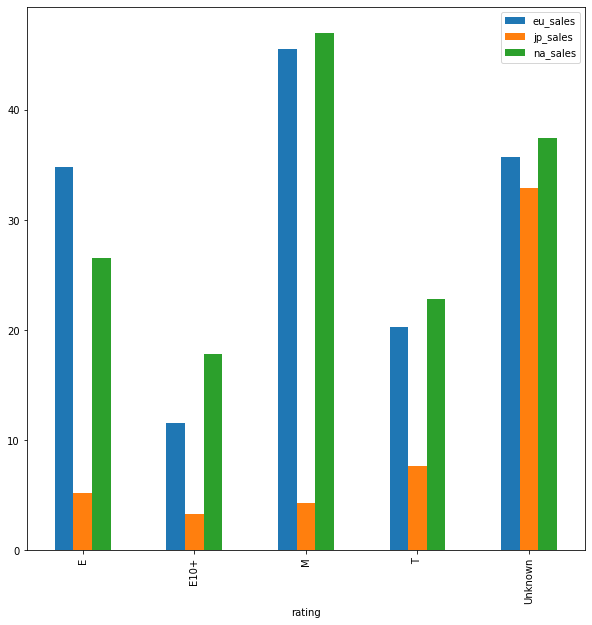

In [52]:
ax = past_two_years.pivot_table(index = 'rating', values = ('na_sales','eu_sales','jp_sales'), aggfunc = 'sum').plot.bar(figsize = (10,10));


We see that in Europe and in North America, The ratings that sell the most are simillar: The 'mature' leads by a lot, after that is 'everyone', then 'teen' and then 'e10'.We already saw the similarity between these 2 regions when we checked genres, and we said it was because of the place of video games in western culture. In Japan however, The rating that sold the most is 'Teen'. This shows that in Japan, Video games are for younger audiences. 

To conclude, The typical American and European users user will be around the age of 17, they will play action, shooter or sports games, and he they be playing on an 'xbox' or a 'ps'. In Japan, the typical user will be around the age of 12, He will be playing role playing or action games, and he will be using a '3DS'.

# Step 5: Testing Hypothesis:

Let's test the following hypothesis: Average user ratings of the Xbox One and PC platforms are the same. My null hypothesis will be that they are the same, because then i can compare them better. My threshold value will be 0.05, because that is the standard threshold, and 0.01 won't neccerely meen that there is a difference. Let's check:

H0: Average user ratings of the Xbox One and PC platforms are the same.

H1: Average user ratings of the Xbox One and PC platforms are the different.

threshold = 0.05

In [53]:
rat_xbox_one = past_two_years.query('platform == "XOne" & user_score > 0')['user_score']
rat_pc = past_two_years.query('platform == "PC" & user_score > 0')['user_score']
alpha = 0.05
results = st.ttest_ind(rat_xbox_one, rat_pc)
print('p-value: ', results.pvalue)
if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 

p-value:  0.24927323177446042
We can't reject the null hypothesis


We can see that our p- value is relativly high. This means that we can't reject our hypothesis that user ratings differ based on platform. This makes sense, because the rating shouldn't have anything to do with the platform, Just with the game.  

Now we'll test the hypothesis that the user ratings depend on the genre. We'll test this on the action and sports genres. Again, our null hypothesis is that they are equal to each other, and our threshold is 0.05.

H0: Average user ratings of the action and sports genres are the same.

H1: Average user ratings of the action and sports genres are the different.

threshold = 0.05

In [54]:
rat_action = past_two_years.query('genre == "Action" & user_score > 0')['user_score']
rat_sports = past_two_years.query('genre == "Sports" & user_score > 0')['user_score']
results = st.ttest_ind(rat_action, rat_sports)
print('p-value: ', results.pvalue)
if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 

p-value:  2.948947463447524e-14
We reject the null hypothesis


So we see we get a very small p-value. This means that we reject our null hypothesis, and it turns out that user ratings does depend on genre. Let's see this in a graph:

Text(0, 0.5, 'Average user rating')

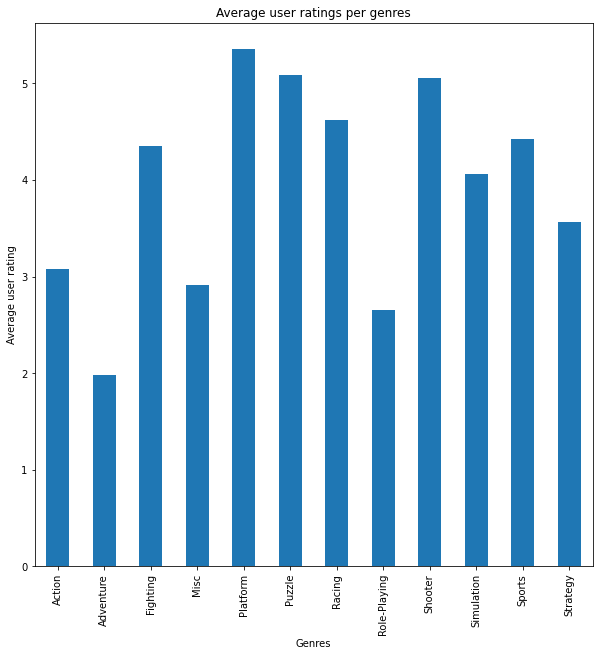

In [55]:
past_two_years.pivot_table(index = 'genre', values = 'user_score').plot.bar(figsize = (10,10), legend = False)
plt.title("Average user ratings per genres")
plt.xlabel('Genres')
plt.ylabel('Average user rating')

So we see that our average rating does differ: we have a range of average ratings from 5 to 2, depending on genre.

# Conclusion

Let's break down what we did in this study:
- Read the data and had a look at it, Changed the column names to lowercase, Changed datatypes of the columns: 'user_score','year_of_release','critic_score'.
- Dealt with missing values: Some we deleted from the datafame, Some we kept, and to some we assigned different values.
- Created a new column of 'total sales'
- Analysed the number of games per year and a platform's typical lifetime and filtered the data accordingly.
- Analysed platform sales from the past 5 years and found the growing platforms.
- Checked how reviews impact the sales.
- Looked at the sales of the same games on different platforms.
- Discovered the popular genres.
- Created a user id for each region: popular platforms, genres and checked how ratings affect the sales.
- Tested hypothesises about what affects the user id.

My analysis shows that:
- The number of games are going down each year.
- A typical platform's lifetime is divided into 2: after 5 years it peaks, and after 10 years people don't buy games on it anymore.
- Historiclly popular platforms like 'PS3' and 'X360' aren't popular anymore.
- The popular sales platforms at the moment are: "PS4", "XOne" and "3DS".
- The platform with the best median price is WiiU, Even though it sold only 5% out of video sales. This is because it does sell well, just it dosen't have a lot of games.
- Reviews don't significantly affect the sales of a game. They do help, But Don't have a significant influence on the audience.
- Different platforms are popular in different genres.
- The most popular genres are 'action', 'shooter', 'sports' and 'role-playing'.
- A game's sales will be higher if it's released on numerous platforms.
- An American and European user id: Mature, playes action, shooter and sports games, and owns an xbox or a ps.
- A Japanease user id: A Teen, playes role playes and action games, and owns a 3DS.
- User Rating is affected by the genre. There are genres that get a better user score.

Regarding 2017, I can reccomend the following:
1. Focusing on the 'PS4' and 'XOne' platforms in America and Europe. In Japan, We also should focus on the '3DS'.
2.  games on 'WiiU' could potentially be a high winners in the next year.
3. When seeing bad reviews on a game, Not to completely give up on it; It might still succeed.
4. Focus on the popular genres in relation to platform: Action, Sports and Shooter games for the XBOX and PS, Role Playing for 3DS.
5. Watching out for games released on multiple platforms. They could be the big winners this year.
6. Regarding marketing, Its crucial to fit a special marketing plan to the japanease market, since the people who buy games there are completly different.